# EXP 9: To Implement K - Means Clustering Algorithm

In [92]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv("C:\\Users\honey\Desktop\Class time\ML\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32
249,250,Female,31,325,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [6]:
df.shape

(250, 5)

In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Extracting Independent Variables
Here we don't need any dependent variable for data pre-processing step as it is a clustering problem.
And we have no idea about what to determine. So we will just add a line of code for the matrix of features.

In [15]:
x = df.iloc[:, [3, 4]].values

# As we can see, we are extracting only 3rd and 4th feature.
# It is because we need a 2d plot to visualize the model, and some features are not required,
# such as customer_id.

# Finding optimal no. of clusters

In the second step, we will try to find the optimal number of clusters for our clustering problem.
So, as discussed above, here we are going to use the elbow method for this purpose.

As we know, the elbow method uses the WCSS concept to draw the plot by plotting
WCSS values on the Y-axis and the number of clusters on the X-axis.
So we are going to calculate the value for WCSS for different k values ranging from 1 to 10.

In [10]:
 wcss_list= []  #Initializing the list for the values of WCSS
                #(Within Cluster Sum of Squares)

In [12]:
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 20)  
    kmeans.fit(x)  
    wcss_list.append(kMeans.inertia_)

NameError: name 'KMeans' is not defined

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

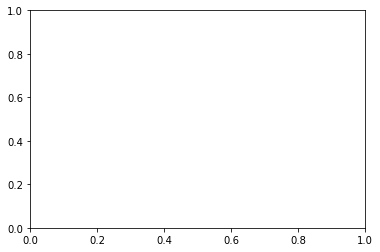

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [7]:
wcss_list

[]

In [28]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

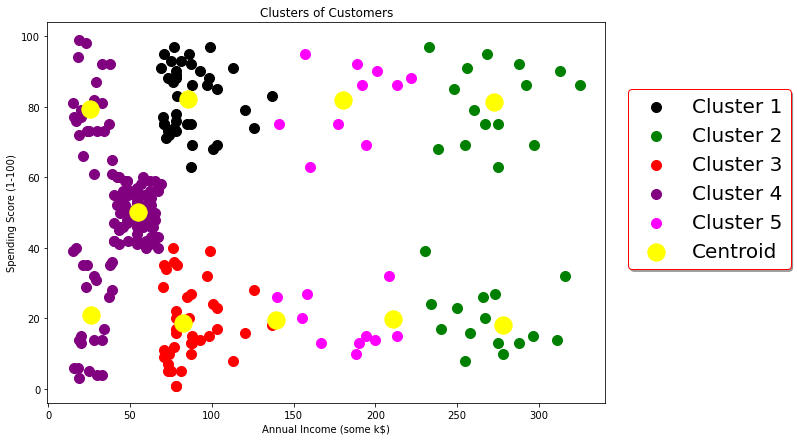

In [86]:
plt.figure(figsize = (10,7))

plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
#for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
#for second cluster  
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
#for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
#for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#for fifth cluster  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=300,c='yellow',label ='Centroid') 
plt.title('Clusters of Customers')  
plt.xlabel('Annual Income (some k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend(bbox_to_anchor= (1.35, 0.85),ncol=1,fontsize=20,facecolor='white',edgecolor='red',shadow=1)
# ncol is no. of columns in legend, also observe vatsav giving a lot of colors to it hahaha
plt.show()  